In [2]:
!pip install fastdtw
!pip install dtw-python

import numpy as np 
# from scipy.spatial.distance import euclidean
from dtw import dtw
import json
import glob 

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [50]:
def compute_distance(x, y):
    alignment = dtw(x, y, keep_internals=True)
    # alignment.plot(type="threeway")
    # return alignment.normalizedDistance
    return alignment.normalizedDistance

In [4]:
def preload_survey_responses():
    responses = {}

    for response in glob.glob("../data/user_responses/*.json"):
        response_tag = response.split("/")[3].split(".")[0]

        with open(response) as f:
            survey_response = json.load(f)

        responses[response_tag] = survey_response

    return responses

def get_four_point_score(response):
    total_score = 0
    total_responses = 0

    total_score += 1 * response["1"]
    total_responses += response["1"]
    
    total_score += 2 * response["2"]
    total_responses += response["2"]
    
    total_score += 3 * response["3"]
    total_responses += response["3"]
    
    total_score += 4 * response["4"]
    total_responses += response["4"]

    return total_score / total_responses

In [5]:
def preload_datasets():
    datasets = {} 
    
    for dataset in glob.glob("../data/formatted_datasets/*.json"):
        ink_tag = dataset.split("/")[3].split(".")[0]
        
        with open(dataset) as f:
            dataset_ink = json.load(f)

        datasets[ink_tag] = dataset_ink

    return datasets

In [16]:
datasets = preload_datasets()
responses = preload_survey_responses()

001g


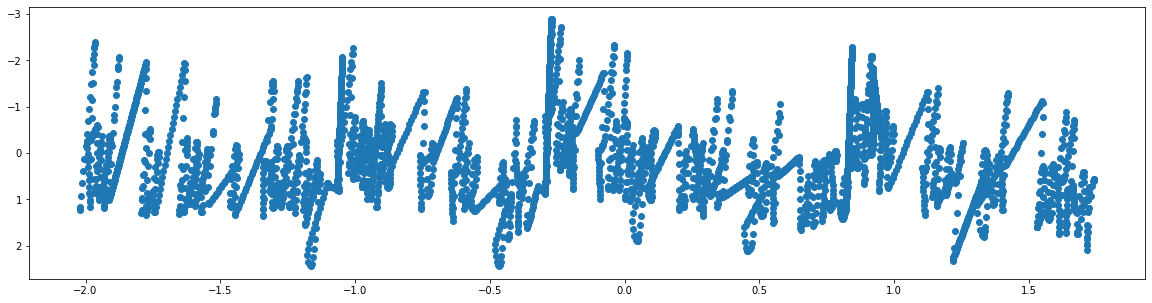

001


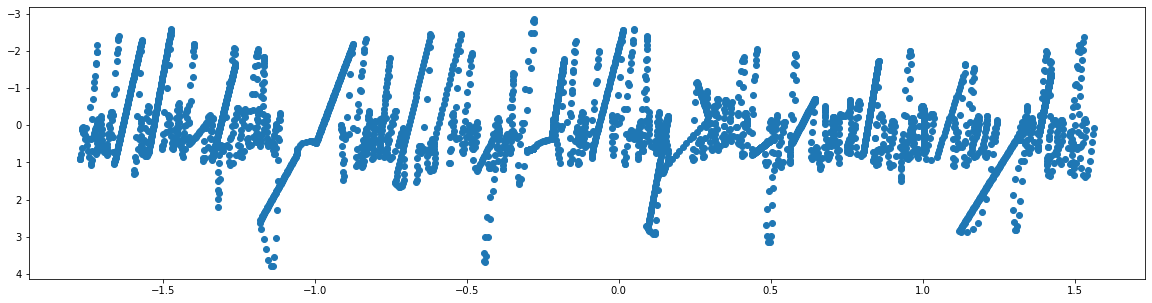

001c


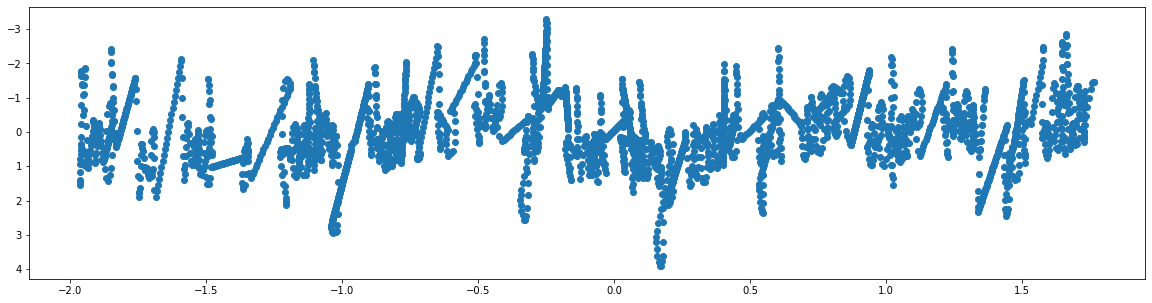

001d


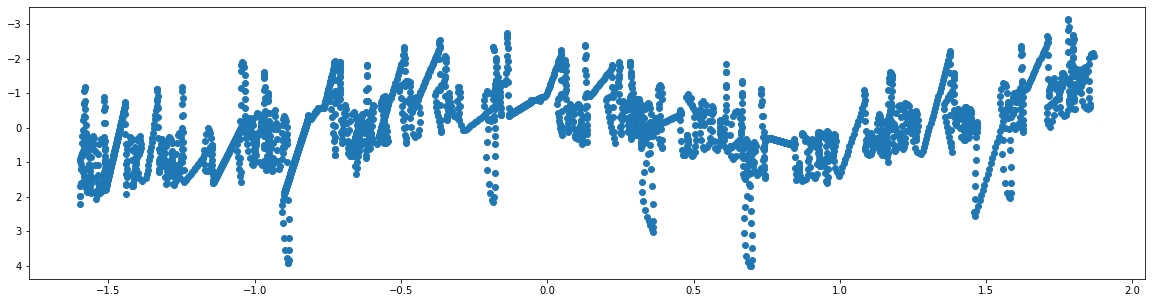

001e


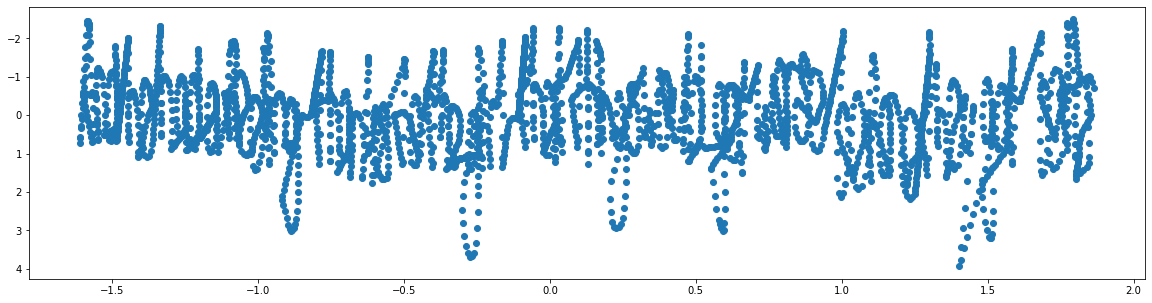

001a


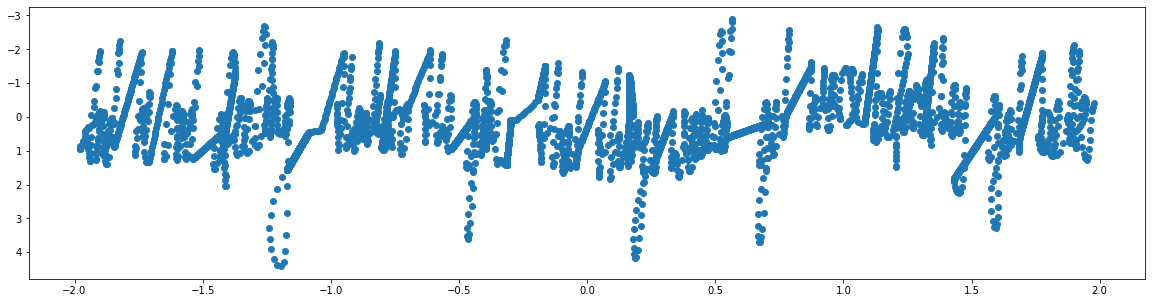

001f


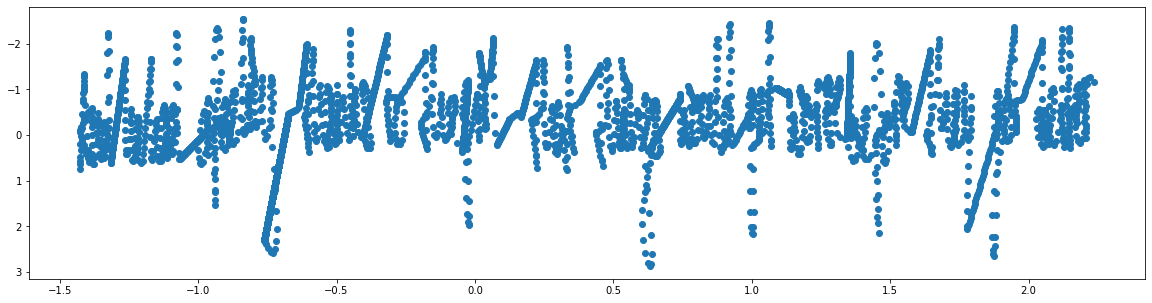

001b


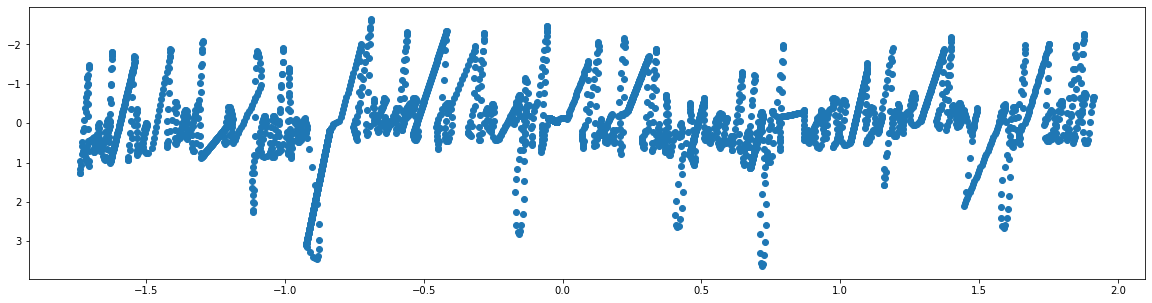

In [19]:
for key in datasets.keys():
    print(key)

    plt.figure(figsize=(20,5))
    plt.gca().invert_yaxis()
    plt.scatter(datasets[key]["x"], datasets[key]["y"])
    plt.show()

In [71]:
four_point_scores = []
distances = []

for user_submission in glob.glob("../data/formatted_ink/*.json"):
    user_tag = user_submission.split("/")[3].split(".")[0]

    with open(user_submission) as f:
        user_ink = json.load(f)

    user_ink = np.array([user_ink["x"], user_ink["y"]])
    user_ink = np.swapaxes(user_ink, 0, 1)

    # user_ink = np.array(user_ink["p"])

    num_samples = 0
    total_distance = 0
    for key in datasets.keys():
        dataset_ink = datasets[key]
        num_samples += 1

        dataset_ink = np.array([dataset_ink["x"], dataset_ink["y"]])
        dataset_ink = np.swapaxes(dataset_ink, 0, 1)

        # dataset_ink = np.array(dataset_ink["p"])
        # dataset_ink = np.swapaxes(dataset_ink, 0, 1)

        total_distance += compute_distance(user_ink, dataset_ink)

    print(user_tag, get_four_point_score(responses[user_tag]), total_distance/num_samples)
    distances.append(total_distance/num_samples)
    four_point_scores.append(get_four_point_score(responses[user_tag]))

8Z8Zk6qnS4S74FIpjs3l 3.8181818181818183 0.22091449247951842
4DEx1UITVvHf7r8utD9Z 2.8181818181818183 0.21118729781959653
8e05bbCJrJlptvjGm1xa 3.0 0.19938958532877427
pwzrwYnnyBRiJaBuWCvZ 3.5 0.22014373202924664
2x7KWpGxDjsH40bJvsP7 2.3636363636363638 0.1997496732568939
QVsCfGYE28LsGxDa1417 2.823529411764706 0.2049977525217326
UJmJnIqlwsNEFfjKelTN 2.8181818181818183 0.19102256254712335
oIH1HmVVxrJVAXRbwjxk 3.1818181818181817 0.21314763329173803
i7pJPDAihjRnN4VGZNKG 3.1818181818181817 0.20038455001066507
lbk43HuL5voOJI49qHRm 3.909090909090909 0.26236240247224174
L1l3xQZg4erNtCnqpgDX 3.1818181818181817 0.22141309778376655
UpjeWjdH7HrpzNvAOnZE 3.5454545454545454 0.19882600099234637
eWYRgAeE4psads07EGIm 4.0 0.24926487720987572
wHbt2fWqZGeUgdc54FEG 4.0 0.20304053632914784


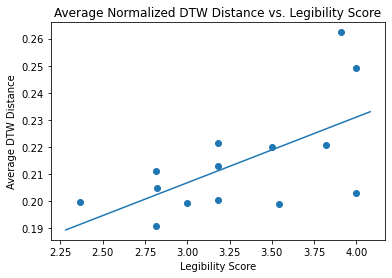

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(four_point_scores, distances)
plt.xlabel("Legibility Score")
plt.ylabel("Average DTW Distance")
plt.title("Average Normalized DTW Distance vs. Legibility Score")
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(four_point_scores, distances, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.show()

In [60]:
with open("../data/formatted_ink/2x7KWpGxDjsH40bJvsP7.json") as f:
        user_ink = json.load(f) 

user_ink = np.array(user_ink["y"])
# user_ink = np.swapaxes(user_ink, 0, 1)

with open("../data/formatted_datasets/001a.json") as f:
        dataset_ink = json.load(f)

dataset_ink = np.array(dataset_ink["y"])
# dataset_ink = np.swapaxes(dataset_ink, 0, 1)

In [61]:
alignment = dtw(user_ink, dataset_ink, keep_internals=True)

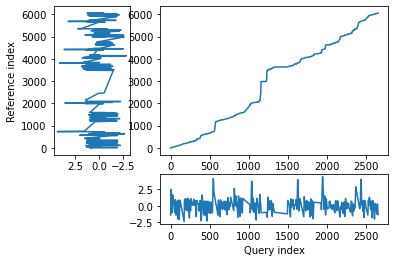

<AxesSubplot:>

In [62]:
alignment.plot(type="threeway")

In [17]:
print(alignment.distance)
print(alignment.normalizedDistance)

1093.8287369609209
0.1785551317272153


# Fastdtw Package 

In [3]:
dataset = np.array([dataset_series["x"], dataset_series["y"]])
dataset = np.swapaxes(dataset, 0, 1)

ink = np.array([digital_ink["x"], digital_ink["y"],])
ink = np.swapaxes(ink, 0, 1)

print(np.shape(dataset))
print(np.shape(ink))

(3952, 2)
(1335, 2)


In [4]:
distance, path = fastdtw(dataset, ink, dist=euclidean)
print(distance)

distance, path = dtw(dataset, ink, dist=euclidean)
print(distance)

1634.5065455509894
1019.1329267369531
